<Figure size 432x288 with 0 Axes>

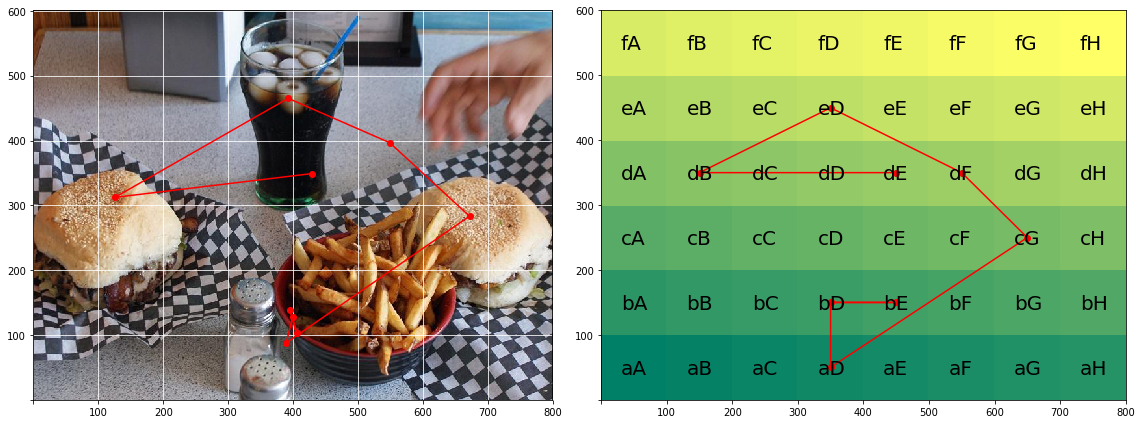

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
from matplotlib.colors import LogNorm
from saliency.utils import scanpath_to_string
from saliency.dataset import SaliencyDataset
from tabulate import tabulate
from PIL import Image
import re


d = SaliencyDataset()
d.load('OSIE')

seqs = d.get('sequence', modify='remove') 
imgs = d.get('stimuli_path')
sample= seqs[200][5]
img = np.array(Image.open(imgs[200]))

height, width = d.data[0]['img_size']
Xbins = 8
Ybins = 6
Tbins = 100
myInterval=100.


scanpath_str, bins = scanpath_to_string(sample[:,:3], height, width, Xbins, Ybins, 0)
scanpath_str_time, bins_t = scanpath_to_string(sample[:,:3], height, width, Xbins, Ybins, Tbins )

all_bins = list()
for j in np.arange(height - 50, 0, - height/Ybins):
    for i in np.arange(50, width, width/Xbins):
        all_bins.append([i,j])
all_bins = np.array(all_bins, dtype=np.int32)
all_bins_str, _ = scanpath_to_string(all_bins, height, width, Xbins, Ybins, 0)
all_bins_str = re.findall('..', all_bins_str) # spliting every 2 character.

Z = np.arange(Xbins * Ybins).reshape(Ybins, Xbins)
fig = plt.figure()
fig, (ax1, ax0) = plt.subplots(1, 2, figsize=(16,6))

c = ax0.pcolor(Z, cmap='summer')
# c = ax1.pcolor(Z, cmap='summer')

# ax0.set_xlim(range(0,600,100))



counter = 0
for j in range(Ybins):
    for i in range(Xbins):
        ax0.text(i +0.3, j  + 0.4, all_bins_str[counter], fontsize=20)
#         ax1.text(i +0.5, j+ 0.5, all_bins_str[counter])
        counter+=1

bins = np.array(bins)

# x = bins%Xbins - 0.5
# y = bins//Ybins - 0.5 
# x[x < 0] = 0.5
# y[y < 0] = 0.5
# x[x > Xbins] = Xbins - 0.5
# y[y > Ybins] = Ybins - 0.5
# ax0.plot(x , y , 'ro-')
ax0.plot(sample[:,0]//100 + 0.5, sample[:,1]//100 + 0.5, 'ro-')

ax0.set_xticks(range(Xbins+1))
ax0.set_yticks(range(Ybins+1))
ax0.set_xticklabels([''] + list(range(100, width+100, 100)))
ax0.set_yticklabels([''] + list(range(100, height+100, 100)))


loc = plticker.MultipleLocator(base=myInterval)
ax1.xaxis.set_major_locator(loc)
ax1.yaxis.set_major_locator(loc)


# Add the grid
ax1.grid(which='both', axis='both', linestyle='-', color='white')

ax1.set_xticks(range(0, width+100, 100))
ax1.set_xticklabels([''] + list(range(100, width+100, 100)))
# ax1.set_yticks(range(0, height+100, 100))
ax1.set_yticklabels([''] + list(range(height, 0, -100)))

ax1.imshow(img)


# bins_t = np.array(bins_t)
ax1.plot(sample[:,0], 600 - sample[:,1], 'ro-')

plt.tight_layout()
plt.savefig('figs/2-2-ScanMatch.png')
plt.show()



In [3]:
print(tabulate(sample[:,:3], tablefmt='latex'))
print(scanpath_str)
print(scanpath_str_time)

\begin{tabular}{rrr}
\hline
 394.9 & 138.4 & 253 \\
 405.6 & 102.7 & 251 \\
 399.4 & 127.7 & 273 \\
 389.6 &  88.3 & 143 \\
 672   & 283.4 & 198 \\
 549   & 396.7 & 184 \\
 392.6 & 465   & 395 \\
 125.5 & 312.4 & 327 \\
 429.4 & 349.1 & 205 \\
\hline
\end{tabular}
eDeEeDfDdGcFbDcBcE
eDeDeEeEeDeDfDdGcFbDbDbDcBcBcBcEcE


In [132]:
 [''] + [str(item) for item in range(100,900,100)]

['', '100', '200', '300', '400', '500', '600', '700', '800']

In [36]:
sample[:,0]//100

array([3., 4., 3., 3., 6., 5., 3., 1., 4.])

In [37]:
sample[:,1]//100

array([1., 1., 1., 0., 2., 3., 4., 3., 3.])

In [7]:
all_bins_str

['aA',
 'aB',
 'aC',
 'aD',
 'aE',
 'aF',
 'aG',
 'aH',
 'bA',
 'bB',
 'bC',
 'bD',
 'bE',
 'bF',
 'bG',
 'bH',
 'cA',
 'cB',
 'cC',
 'cD',
 'cE',
 'cF',
 'cG',
 'cH',
 'dA',
 'dB',
 'dC',
 'dD',
 'dE',
 'dF',
 'dG',
 'dH',
 'eA',
 'eB',
 'eC',
 'eD',
 'eE',
 'eF',
 'eG',
 'eH',
 'fA',
 'fB',
 'fC',
 'fD',
 'fE',
 'fF',
 'fG',
 'fH']